In [1]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import h5py

In [2]:
import scvi
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.1.6


In [3]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [4]:
adatas = [x for x in os.listdir('/mnt/c/Users/ethan/OneDrive/桌面/Heter_Neu/SC1186/rawdata/') if x.endswith('.h5')]

In [5]:
adatas

['2054_00_raw_.h5',
 '2060_41_raw_.h5',
 '2070_00_raw_.h5',
 '2072_00_raw_.h5',
 '2074_00_raw_.h5',
 '2075_00_raw_.h5',
 '2094_01_raw_.h5',
 'S14_00_raw_.h5',
 'S15_00_raw_.h5',
 'S16_00_raw_.h5',
 'S17_00_raw_.h5']

In [6]:
def load_it(adata):
    samp = adata.split('_')[0]
    days = adata.split('_')[1]
    adata = sc.read_10x_h5('/mnt/c/Users/ethan/OneDrive/桌面/Heter_Neu/SC1186/rawdata/' + adata)
    adata.var_names_make_unique()
    adata.obs['Patient'] = samp
    adata.obs['Days'] = days
    adata.obs['Sample'] = adata.obs['Patient'] + '_' + adata.obs['Days']
    adata.obs.index = adata.obs.index + '-' + samp + '_' + days
    return adata

In [7]:
adatas = [load_it(ad) for ad in adatas]

In [8]:
adatas

[AnnData object with n_obs × n_vars = 98896 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 64501 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 90838 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 116580 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 141204 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 52652 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 102976 × 37143
     obs: 'Patient', 'Days', 'Sample'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_o

In [9]:
adata = sc.concat(adatas, join='outer')

In [10]:
adata.X.shape

(1129253, 37143)

In [11]:
adata.raw = adata

In [12]:
print (adata.raw)

Raw AnnData with n_obs × n_vars = 1129253 × 37143


In [13]:
sample_info = []
for sample in adata.obs['Sample'].unique():
    sample_data = adata[adata.obs['Sample'] == sample]
    sample_info.append([sample, sample_data.n_obs, sample_data.n_vars])

df = pd.DataFrame(sample_info, columns=['Sample_ID', 'Cell_Number', 'Gene_Number'])

df

,Sample_ID,Cell_Number,Gene_Number
0,2054_00,98896,37143
1,2060_41,64501,37143
2,2070_00,90838,37143
3,2072_00,116580,37143
4,2074_00,141204,37143
5,2075_00,52652,37143
6,2094_01,102976,37143
7,S14_00,140869,37143
8,S15_00,97218,37143
9,S16_00,114278,37143


In [14]:
adata

AnnData object with n_obs × n_vars = 1129253 × 37143
    obs: 'Patient', 'Days', 'Sample'

In [15]:
#Remove cells with fewer than 50 expressed genes
sc.pp.filter_genes(adata, min_counts=50)

In [16]:
#Minimal UMI counts = 3
sc.pp.filter_cells(adata, min_counts=3)

In [17]:
#at least 15 genes in a cell
sc.pp.filter_cells(adata, min_genes=15) 

In [18]:
sample_info = []
for sample in adata.obs['Sample'].unique():
    sample_data = adata[adata.obs['Sample'] == sample]
    sample_info.append([sample, sample_data.n_obs, sample_data.n_vars])

df = pd.DataFrame(sample_info, columns=['Sample_ID', 'Cell_Number', 'Gene_Number'])

df

,Sample_ID,Cell_Number,Gene_Number
0,2054_00,4264,9344
1,2060_41,1303,9344
2,2070_00,3498,9344
3,2072_00,5647,9344
4,2074_00,5805,9344
5,2075_00,2228,9344
6,2094_01,4867,9344
7,S14_00,6584,9344
8,S15_00,5764,9344
9,S16_00,5801,9344


In [19]:
adata

AnnData object with n_obs × n_vars = 50031 × 9344
    obs: 'Patient', 'Days', 'Sample', 'n_counts', 'n_genes'
    var: 'n_counts'

In [20]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

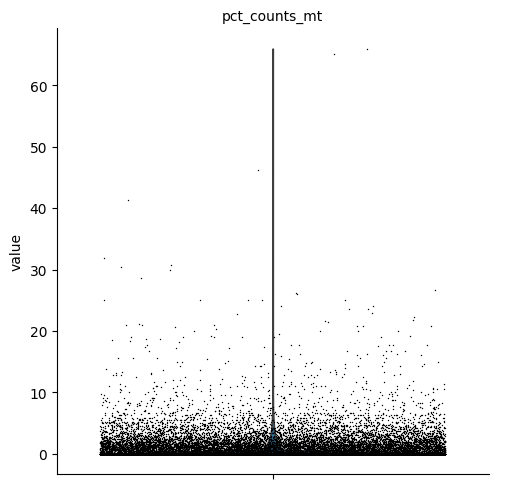

In [21]:
sc.pl.violin(adata, 'pct_counts_mt', jitter=0.4, multi_panel=True)

In [23]:
adata

AnnData object with n_obs × n_vars = 50031 × 9344
    obs: 'Patient', 'Days', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

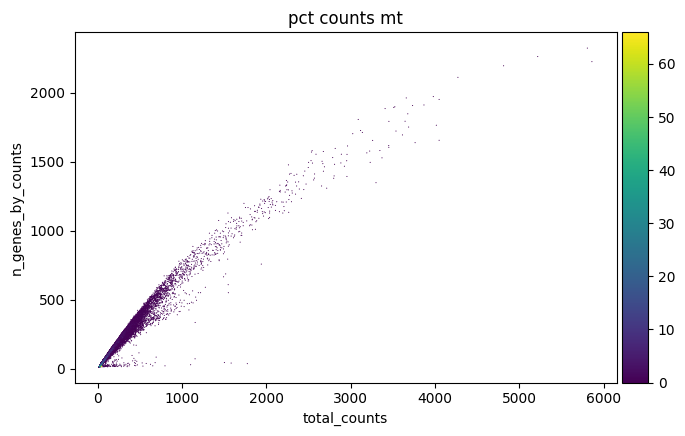

In [26]:
#UMI counts vs genes detected per cell
sc.pl.scatter(
    adata, 
    x='total_counts', 
    y='n_genes_by_counts', 
    color='pct_counts_mt', 
)

In [27]:
#cutoff UMI 30
sc.pp.filter_cells(adata, min_counts=30)

In [28]:
adata

AnnData object with n_obs × n_vars = 42528 × 9344
    obs: 'Patient', 'Days', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [30]:
scvi.model.SCVI.setup_anndata(adata)

In [31]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [32]:
model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 188/188: 100%|█████| 188/188 [09:10<00:00,  2.70s/it, v_num=1, train_loss_step=218, train_loss_epoch=235]

`Trainer.fit` stopped: `max_epochs=188` reached.


Epoch 188/188: 100%|█████| 188/188 [09:10<00:00,  2.93s/it, v_num=1, train_loss_step=218, train_loss_epoch=235]


In [33]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [34]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

In [35]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


In [36]:
model.save("/mnt/c/Users/ethan/OneDrive/桌面/Heter_Neu/SC1186/model-2")

In [37]:
#load model

In [38]:
import torch
import tempfile
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

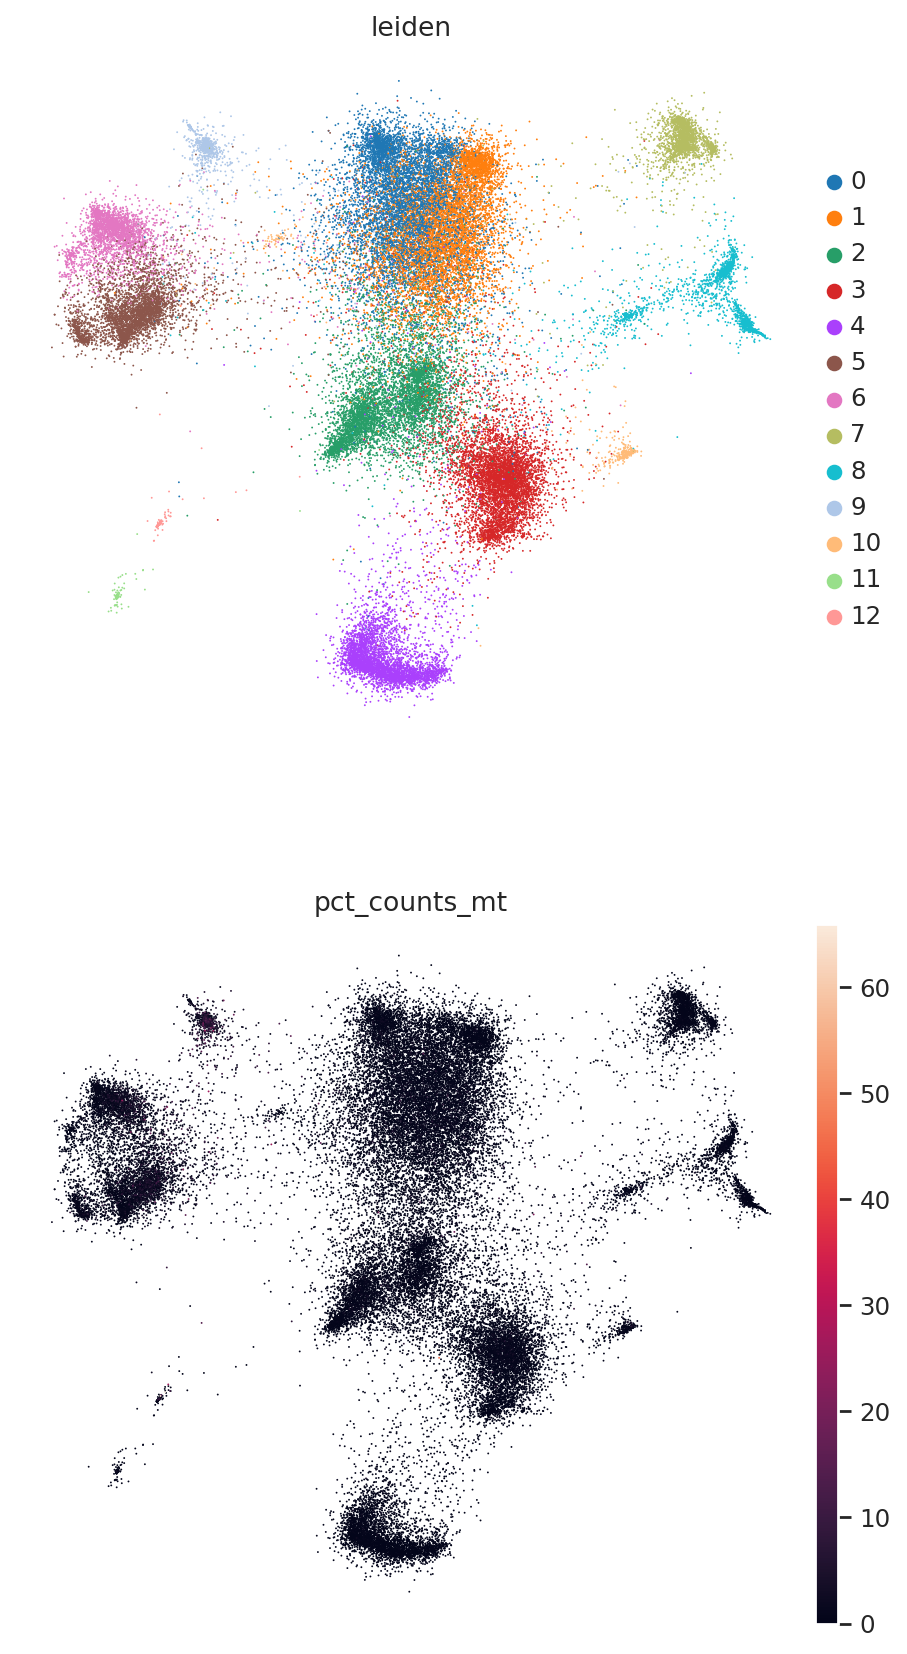

In [39]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["leiden","pct_counts_mt"],
    frameon=False,
    ncols=1,
)

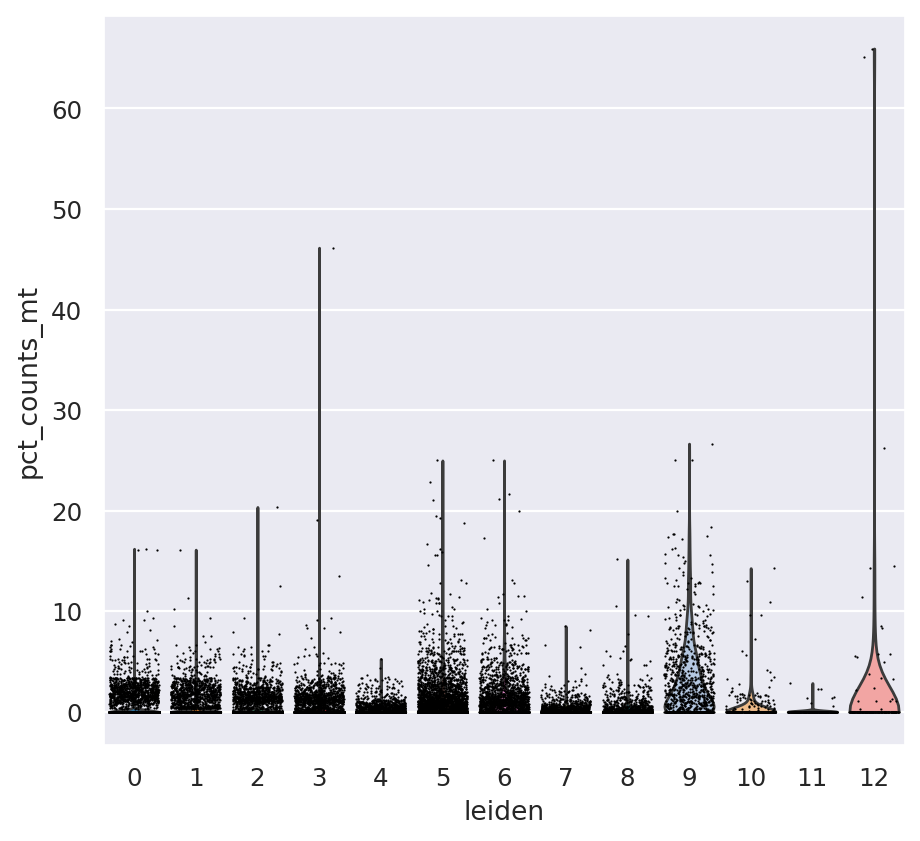

In [40]:
sc.pl.violin(adata, 'pct_counts_mt', groupby='leiden', jitter=0.4, multi_panel=True)

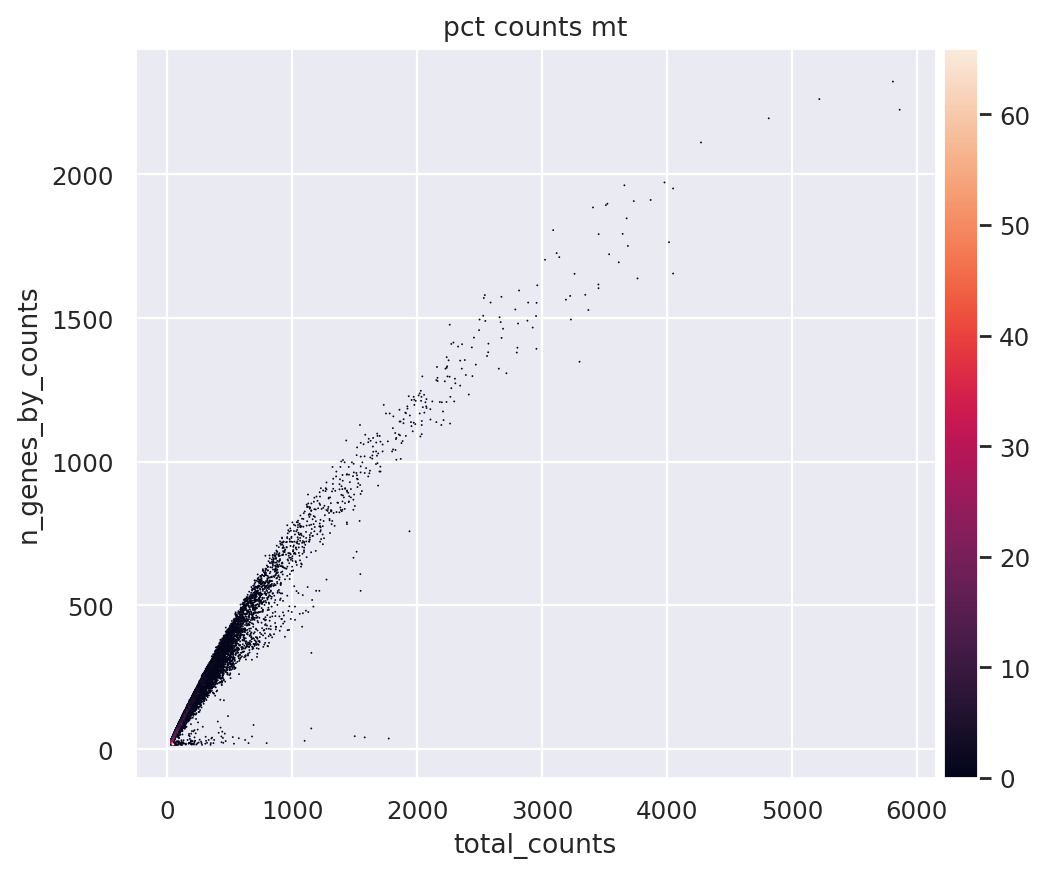

In [41]:
#UMI counts vs genes detected per cell
sc.pl.scatter(
    adata, 
    x='total_counts', 
    y='n_genes_by_counts', 
    color='pct_counts_mt', 
)

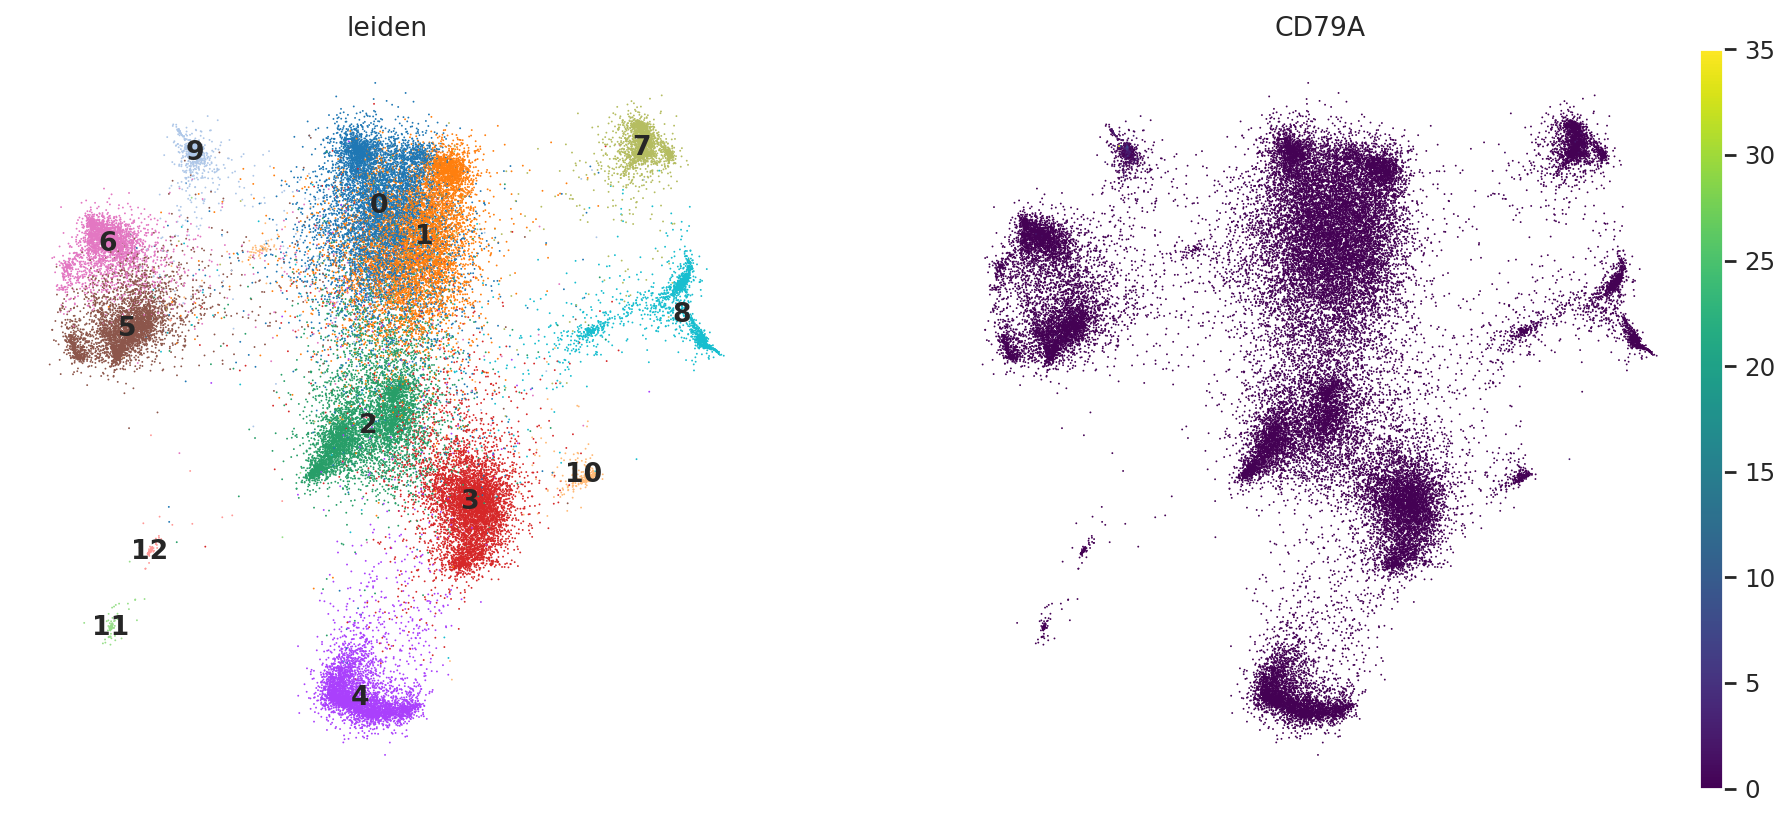

In [42]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=['leiden','CD79A'],
    frameon=False,
    ncols=3,
    cmap='viridis',
    legend_loc='on data',
    legend_fontsize=12
)

In [ ]:
sc.pl.violin(adata, 'pct_counts_mt', groupby='leiden', jitter=0.4, multi_panel=True)